In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import sys

In [2]:
train_file_path = sys.argv[1]

In [3]:
train = pd.read_csv('/Users/praveena/Downloads/ThoraricSurgery.csv',header=None)
train.columns = ["DGN", "PRE4", "PRE5", "PRE6","PRE7","PRE8","PRE9","PRE10","PRE11","PRE14","PRE17","PRE19","PRE25","PRE30","PRE32","AGE","Risk1Yr"]

In [4]:
train.head()

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [5]:
train.dropna()
trainData = train.drop(train.columns[-1],axis=1)
testData = train[train.columns[-1]]

trainDummies = pd.get_dummies(trainData, columns=["DGN", "PRE4", "PRE5", "PRE6","PRE7","PRE8","PRE9","PRE10","PRE11","PRE14","PRE17","PRE19","PRE25","PRE30","PRE32","AGE"])

In [6]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(trainDummies, testData, test_size=0.25, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()

In [8]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
predictions = logisticRegr.predict(x_test)

In [10]:

score = logisticRegr.score(x_test, y_test)
print(score)

0.805084745763


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [12]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[95  2]
 [21  0]]


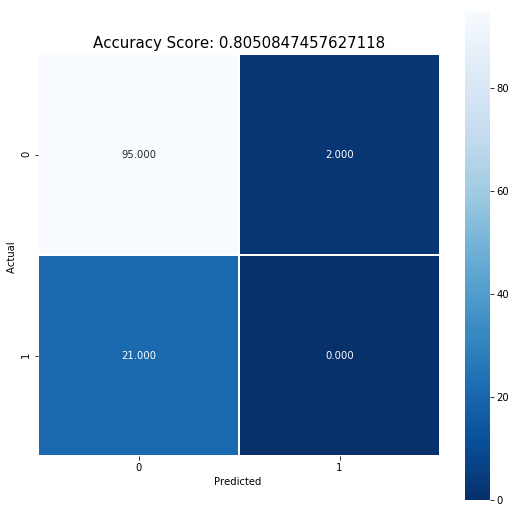

In [13]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual ');
plt.xlabel('Predicted ');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()

In [14]:
from sklearn import cross_validation


/Users/praveena/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
from sklearn.cross_validation import KFold, cross_val_score
k_fold = KFold(len(y_train), n_folds=10, shuffle=True, random_state=0)
clf = LogisticRegression()
cv=cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1)
print(cv)

[ 0.83333333  0.77777778  0.82857143  0.82857143  0.88571429  0.88571429
  0.82857143  0.77142857  0.85714286  0.88571429]


In [16]:
print(cv.mean())

0.838253968254
